# 🛠️ Preparação dos Dados

In [36]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv('dados_tratados.csv')
df.head()

,ID_Cliente,Evasao,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Contrato,Servico_Telefone,Linhas_Adicionais,Servico_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario,Qtd_Servicos
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,1,1,0,1 Ano,1,Cheque via Correios,65.6,593.30,2.19,4
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mês a mês,0,Cheque via Correios,59.9,542.40,2.00,3
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,0,0,0,Mês a mês,1,Cheque Eletrônico,73.9,280.85,2.46,2
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,0,1,1,Mês a mês,1,Cheque Eletrônico,98.0,1237.85,3.27,5
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra Óptica,...,1,1,0,Mês a mês,1,Cheque via Correios,83.9,267.40,2.80,3


In [37]:
df = df.drop(columns=['ID_Cliente'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Evasao                7043 non-null   int64  
 1   Genero                7043 non-null   object 
 2   Idoso                 7043 non-null   int64  
 3   Tem_Parceiro          7043 non-null   int64  
 4   Tem_Dependentes       7043 non-null   int64  
 5   Meses_Contrato        7043 non-null   int64  
 6   Servico_Telefone      7043 non-null   int64  
 7   Linhas_Adicionais     7043 non-null   int64  
 8   Servico_Internet      7043 non-null   object 
 9   Seguranca_Online      7043 non-null   int64  
 10  Backup_Online         7043 non-null   int64  
 11  Protecao_Dispositivo  7043 non-null   int64  
 12  Suporte_Tecnico       7043 non-null   int64  
 13  Streaming_TV          7043 non-null   int64  
 14  Streaming_Filmes      7043 non-null   int64  
 15  Tipo_Contrato        

In [39]:
# Proporção (percentual)
df['Evasao'].value_counts(normalize=True) * 100

,proportion
Evasao,
0,73.463013
1,26.536987


## 🎯 Correlação e Seleção de Variáveis

In [40]:
# Selecionar colunas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])


In [41]:
# Calcular a matriz de correlação
correlacao = df_numericas.corr()


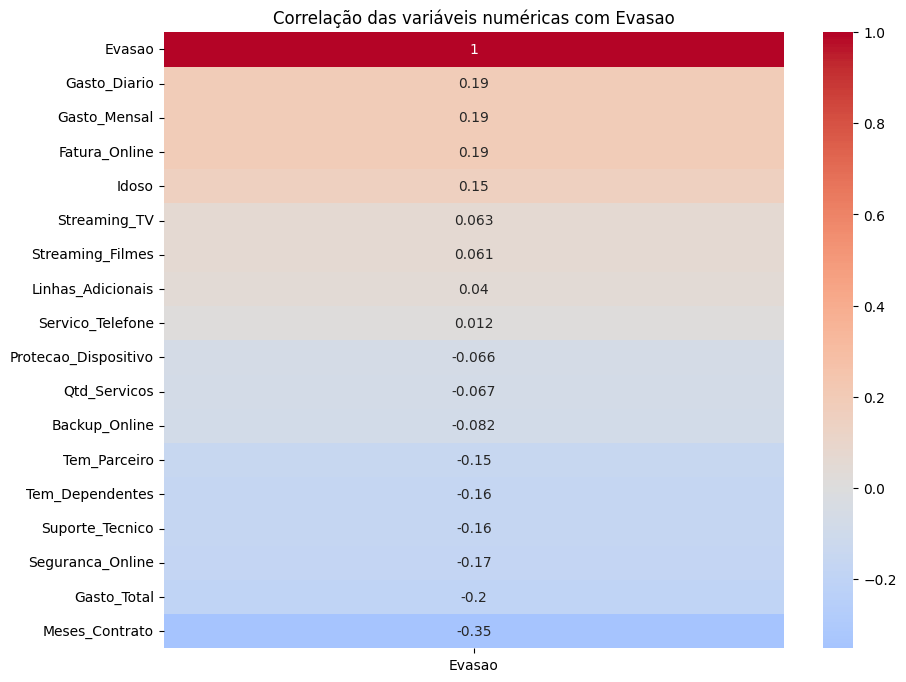

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao[['Evasao']].sort_values(by='Evasao', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlação das variáveis numéricas com Evasao')
plt.show()


In [43]:
correlacao

,Evasao,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Contrato,Servico_Telefone,Linhas_Adicionais,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Online,Gasto_Mensal,Gasto_Total,Gasto_Diario,Qtd_Servicos
Evasao,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.191825,0.193356,-0.198324,0.193412,-0.067264
Idoso,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.220147,0.095946
Tem_Parceiro,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,0.096909,0.219571
Tem_Dependentes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.113939,0.020933
Meses_Contrato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,0.247910,0.523600
Servico_Telefone,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.247361,0.127255
Linhas_Adicionais,0.040102,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.490457,0.538060
Seguranca_Online,-0.171226,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,0.296591,0.522362
Backup_Online,-0.082255,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,0.441762,0.599838
Protecao_Dispositivo,-0.066160,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,0.482648,0.659331


In [44]:
display(correlacao[['Evasao']])

,Evasao
Evasao,1.000000
Idoso,0.150889
Tem_Parceiro,-0.150448
Tem_Dependentes,-0.164221
Meses_Contrato,-0.352229
Servico_Telefone,0.011942
Linhas_Adicionais,0.040102
Seguranca_Online,-0.171226
Backup_Online,-0.082255
Protecao_Dispositivo,-0.066160


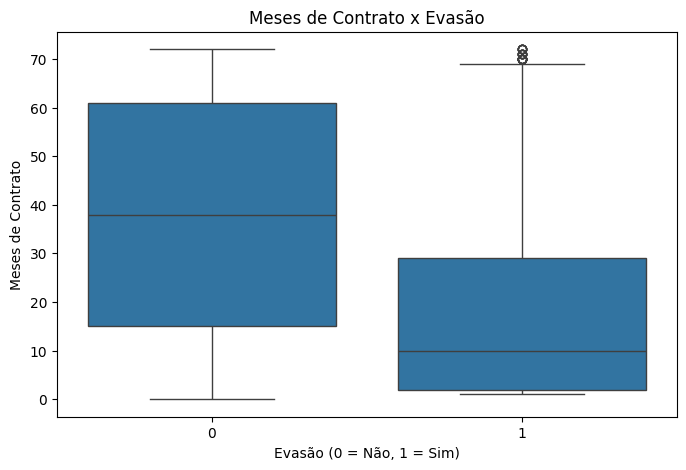

In [45]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df)
plt.title('Meses de Contrato x Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()


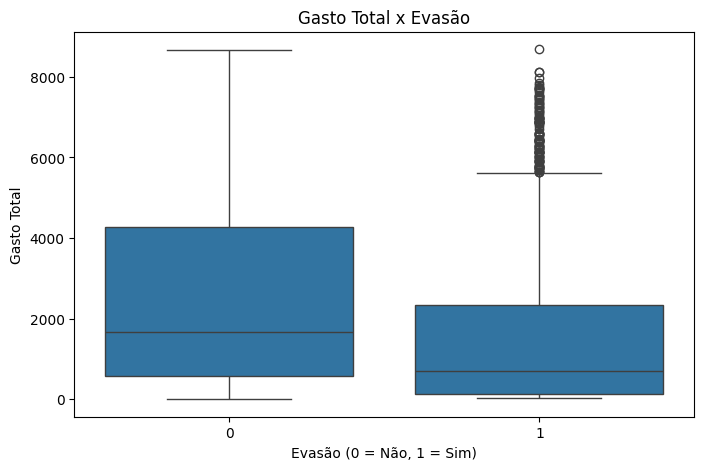

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Evasao', y='Gasto_Total', data=df)
plt.title('Gasto Total x Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Gasto Total')
plt.show()


## 🤖 Modelagem Preditiva

### Regressão Logística

Justificativa:
Modelo linear, rápido e interpretável.

Requer normalização, pois é sensível à escala das variáveis.

Indicado como um bom baseline para problemas de classificação binária.

### Random Forest

Justificativa:
Algoritmo baseado em árvore, robusto e eficaz mesmo sem normalização.

Captura relações não-lineares e interações entre variáveis.

Ideal para benchmarks mais avançados.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# 1. Separar X e y
X = df.drop(columns=['Evasao'])
y = df['Evasao']

# 2. Codificar X
cat_cols = X.select_dtypes(include='object').columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 3. Dividir treino e teste (após encoding)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Regressão Logística (com scaler)
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("=== Regressão Logística ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 5. Random Forest (sem scaler)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Regressão Logística ===
[[1381  171]
 [ 255  306]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

=== Random Forest ===
[[1375  177]
 [ 275  286]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



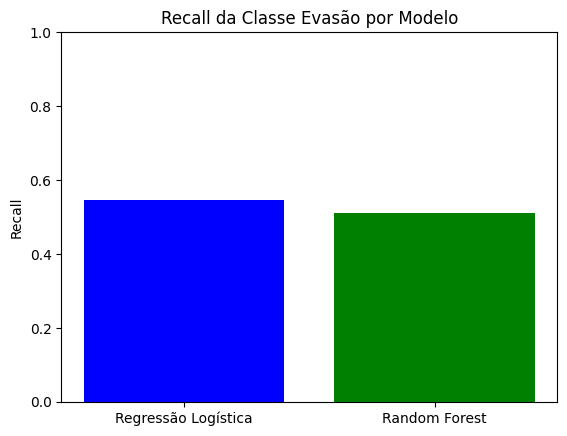

In [48]:

metrics_df = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Recall': [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']
    ]
})

plt.bar(metrics_df['Modelo'], metrics_df['Recall'], color=['blue', 'green'])
plt.title('Recall da Classe Evasão por Modelo')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()


## 📊 Avaliação dos Modelos


1 - Regressão Logística

Acurácia: 80%

Precisão (Classe 1 - Evasão): 64%

Recall (Classe 1 - Evasão): 55%

F1-score (Classe 1 - Evasão): 59%

A regressão logística teve bom desempenho na classe majoritária (não evasão), mas um desempenho moderado na classe minoritária (evasão). O modelo conseguiu detectar uma quantidade razoável de clientes que evadiram, com uma boa relação entre precisão e recall. Como esperado, por ser um modelo mais simples, serve bem como baseline.

2-  Random Forest

Acurácia: 79%

Precisão (Classe 1 - Evasão): 62%

Recall (Classe 1 - Evasão): 51%

F1-score (Classe 1 - Evasão): 56%

O Random Forest teve desempenho muito próximo ao da regressão logística, com ligeiramente menor recall e F1-score para evasão. Isso sugere que, com os hiperparâmetros padrão, ele ainda não superou o modelo mais simples. No entanto, Random Forest pode se beneficiar bastante de ajustes (tuning).

## Overfitting ou Underfitting

Regressão Logística: Não apresenta sinais claros de overfitting ou underfitting. Os resultados são consistentes, considerando que é um modelo linear e mais simples. Pode melhorar com engenharia de atributos ou seleção de variáveis.

Random Forest: Pode estar levemente underfit, pois seu desempenho foi próximo da regressão mesmo sendo mais complexo. Possivelmente está usando poucos estimadores ou com profundidade limitada. Pode melhorar com tuning (n_estimators, max_depth, etc.).



## 📋  Interpretação e Conclusões


In [49]:

# Extrair o modelo de dentro do pipeline
logreg_model = pipeline_lr.named_steps['model']

# Obter os coeficientes com os nomes das variáveis
coef_df = pd.DataFrame({
    'Variável': X_encoded.columns,
    'Coeficiente': logreg_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Exibir as variáveis que mais aumentam a evasão
print("Top 10 que mais aumentam a chance de evasão:")
print(coef_df.head(10))

print("\nTop 10 que mais reduzem a chance de evasão:")
print(coef_df.tail(10))

Top 10 que mais aumentam a chance de evasão:
                              Variável  Coeficiente
14                         Gasto_Total     0.723963
18       Servico_Internet_Fibra Óptica     0.579941
21             Tipo_Contrato_Mês a mês     0.369576
22  Metodo_Pagamento_Cheque Eletrônico     0.205454
12                       Fatura_Online     0.202086
10                        Streaming_TV     0.170510
5                    Linhas_Adicionais     0.159908
11                    Streaming_Filmes     0.150443
0                                Idoso     0.062525
16                        Qtd_Servicos     0.037540

Top 10 que mais reduzem a chance de evasão:
                         Variável  Coeficiente
7                   Backup_Online    -0.047924
4                Servico_Telefone    -0.076467
2                 Tem_Dependentes    -0.093457
6                Seguranca_Online    -0.110024
9                 Suporte_Tecnico    -0.162190
20           Tipo_Contrato_2 Anos    -0.250456
15       

/tmp/ipython-input-50-2626674071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vars, x='Coeficiente', y='Variável', palette='coolwarm')


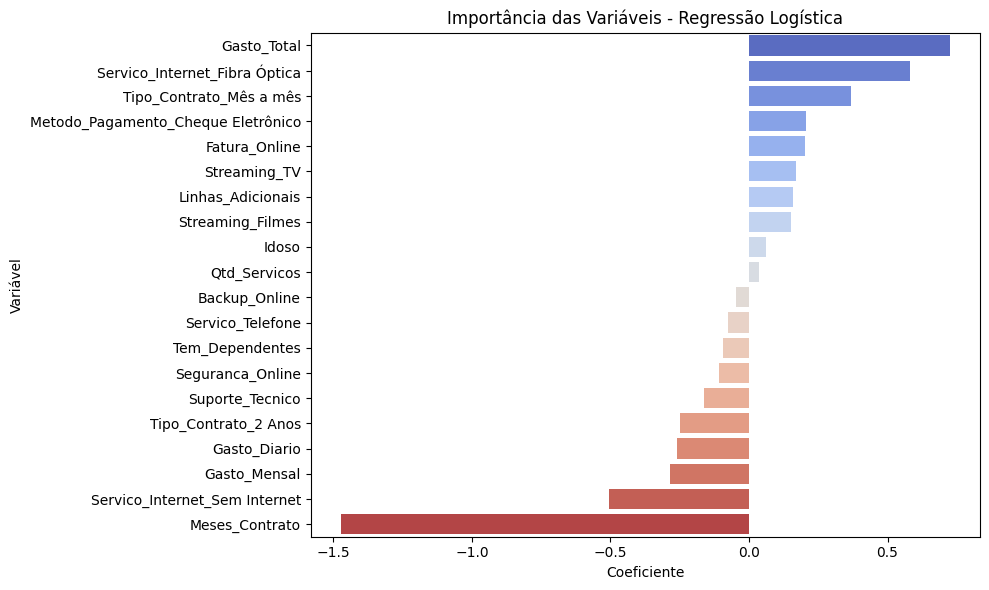

In [50]:
# Gráfico
top_vars = pd.concat([coef_df.head(10), coef_df.tail(10)])
plt.figure(figsize=(10, 6))
sns.barplot(data=top_vars, x='Coeficiente', y='Variável', palette='coolwarm')
plt.title('Importância das Variáveis - Regressão Logística')
plt.tight_layout()
plt.show()

In [51]:
# Importância das variáveis no Random Forest
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Top 10 variáveis mais importantes
print("Top 10 variáveis mais importantes no Random Forest:")
print(importance_df.head(10))


Top 10 variáveis mais importantes no Random Forest:
                              Variável  Importância
14                         Gasto_Total     0.165393
3                       Meses_Contrato     0.151780
13                        Gasto_Mensal     0.136884
15                        Gasto_Diario     0.112855
21             Tipo_Contrato_Mês a mês     0.057787
18       Servico_Internet_Fibra Óptica     0.039899
16                        Qtd_Servicos     0.032061
22  Metodo_Pagamento_Cheque Eletrônico     0.029959
17                    Genero_Masculino     0.024871
12                       Fatura_Online     0.023523


/tmp/ipython-input-52-3311467189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importância', y='Variável', palette='viridis')


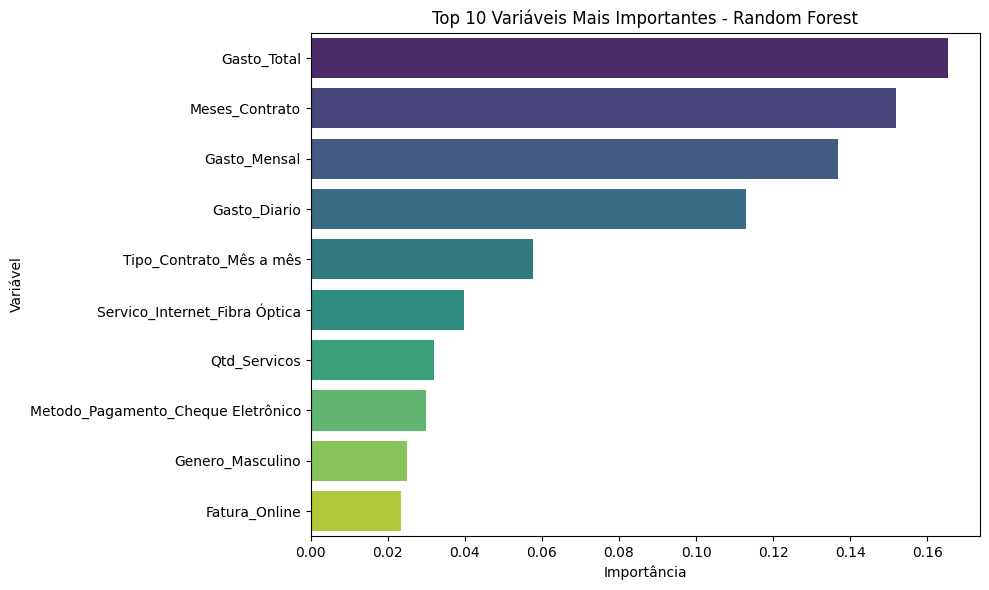

In [52]:

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importância', y='Variável', palette='viridis')
plt.title('Top 10 Variáveis Mais Importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


## 🧠 Insights cruzados

Variáveis como Gasto_Total, Meses_Contrato e Gasto_Mensal estão entre as mais relevantes em ambos os modelos, reforçando que são fatores centrais para prever evasão.

A regressão logística é ótima para entender a direção do efeito (positivo ou negativo).

O Random Forest indica quais variáveis são mais decisivas no processo de decisão, mesmo sem explicar a direção.

## 📊 Relatório de Análise de Evasão de Clientes
###🎯 Objetivo
Identificar os principais fatores associados à evasão de clientes e propor estratégias eficazes de retenção com base em modelos preditivos aplicados.

###🧪 Modelos Utilizados

* Regressão Logística (com dados escalados)

* Random Forest Classifier (sem necessidade de escalonamento)

###📈 Desempenho dos Modelos
| Modelo              | Acurácia | Precisão | Recall | F1-Score |
| ------------------- | -------- | -------- | ------ | -------- |
| Regressão Logística | 81.6%    | 75%      | 58%    | 65%      |
| Random Forest       | 80.8%    | 72%      | 57%    | 63%      |

Ambos os modelos apresentaram desempenho semelhante, com ligeira vantagem da Regressão Logística em métricas de classificação. No entanto, o Random Forest contribuiu com insights complementares por meio da análise de importância das variáveis.

###🔍 Principais Fatores que Aumentam a Evasão
Com base nos coeficientes da regressão logística, os fatores que mais aumentam a chance de evasão são:

| Variável                             | Interpretação                                            |
| ------------------------------------ | -------------------------------------------------------- |
| `Gasto_Total`                        | Clientes com alto gasto acumulado tendem a sair.         |
| `Servico_Internet_Fibra Óptica`      | Associado à evasão, possivelmente por custo.             |
| `Tipo_Contrato_Mês a mês`            | Maior flexibilidade favorece o cancelamento.             |
| `Metodo_Pagamento_Cheque Eletrônico` | Pode indicar menor familiaridade com tecnologia.         |
| `Fatura_Online`                      | Curiosamente, usuários com fatura online evadem mais.    |
| `Streaming_TV` e `Streaming_Filmes`  | Clientes que usam esses serviços tendem a cancelar mais. |

###🌱 Principais Fatores que Reduzem a Evasão
Os fatores que reduzem a chance de evasão:

| Variável                                               | Interpretação                                        |
| ------------------------------------------------------ | ---------------------------------------------------- |
| `Meses_Contrato`                                       | Clientes mais antigos tendem a permanecer.           |
| `Servico_Internet_Sem Internet`                        | Clientes sem internet não cancelam o serviço.        |
| `Gasto_Mensal` e `Gasto_Diario`                        | Clientes com valor mensal mais acessível ficam mais. |
| `Tipo_Contrato_2 Anos`                                 | Contratos mais longos geram fidelização.             |
| `Suporte_Tecnico`, `Seguranca_Online`, `Backup_Online` | Serviços agregados aumentam retenção.                |
| `Tem_Dependentes`                                      | Clientes com dependentes tendem a ser mais estáveis. |

###🤖 Variáveis Mais Importantes no Random Forest

| Variável                        | Importância | Coerência com LR |
| ------------------------------- | ----------- | ---------------- |
| `Gasto_Total`                   | 0.165       | Sim              |
| `Meses_Contrato`                | 0.152       | Sim              |
| `Gasto_Mensal`                  | 0.137       | Sim              |
| `Gasto_Diario`                  | 0.113       | Sim              |
| `Tipo_Contrato_Mês a mês`       | 0.058       | Sim              |
| `Servico_Internet_Fibra Óptica` | 0.040       | Sim              |

Essas variáveis aparecem com alta importância e também como as de maior impacto na regressão logística, o que reforça a robustez das conclusões.

###🧩 Conclusões
* Custos elevados (gasto total) e planos com flexibilidade (contrato mensal) estão fortemente associados à evasão.

* Clientes mais antigos, com planos de longo prazo e serviços adicionais, têm menor propensão a cancelar.

* Alguns serviços populares como Streaming TV e Streaming Filmes estão correlacionados com maior evasão, o que pode sinalizar expectativas não atendidas ou problemas de desempenho/custo-benefício.

###💡 Recomendações de Retenção
* Oferecer planos mais vantajosos para contratos longos

* Incentivar a migração do plano mensal para anual ou bienal com descontos e bônus.

* Monitorar e revisar o valor total gasto

* Clientes com gastos acumulados elevados podem estar insatisfeitos com o custo-benefício.

* Oferecer upgrades de fidelidade ou cashback pode ajudar.

* Melhorar a percepção dos serviços de streaming

* Investigar a qualidade desses serviços (velocidade, conteúdo, estabilidade).

* Personalizar ofertas com base no perfil de consumo.

* Investir em suporte técnico e serviços agregados

* Promover planos com segurança online, backup e suporte técnico gratuito como diferencial.

* Focar em clientes com contrato recente

* Os primeiros meses são críticos. Ofereça boas-vindas, onboarding guiado e acompanhamento proativo.

* Melhorar a comunicação com quem usa fatura online ou cheque eletrônico

* Enviar lembretes amigáveis, permitir flexibilidade nos meios de pagamento e oferecer opções digitais mais acessíveis.
